# Population in Ireland

#### Data preparation and Visualization(dpv1)
1. You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

## 1. Data Exploration and Cleaning(EDA)

### 1.1 Importing Libraries and Declaring functions

##### Programming for Data Analytics (pda1)
1. The project must be explored programmatically, this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook. Your codebook should be properly annotated. The project documentation must include sound justifications and explanation of your code choices (code quality standards should also be applied). [0-50]

In [1]:
#import library packages
import numpy as np
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


##### Programming  for Data Analytics(pda2)
2. In a dedicated section in your report, discuss your use of aspects of various programming paradigms in the development of your project. For example, this may include (but is not limited to) how they influenced your design decisions or how they helped you solve problems. Note that marks may not be awarded if the discussion does not involve your specific project. [0-50]

Defining functions for Graphs

In [2]:
# Plot a bar with seaborn
def plotBarWithSeaborn(df_data, x_name, y_name, title, axis_x_name, axis_y_name, rotation = False, hue_ = None,legend_t = None):    
    g = sns.catplot(
        x=x_name,       # x variable name
        y=y_name,       # y variable name
        data=df_data,     # dataframe to plot
        kind="bar",
        hue =hue_
    )
    plt.title(title)
    plt.xlabel(axis_x_name)
    plt.ylabel(axis_y_name)
    
    if rotation :        
        plt.xticks(rotation=90)
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    #plt.tight_layout()
    if legend_t != None:
        sns.move_legend(g, "upper center", bbox_to_anchor=(1, 1), title=legend_t)

    plt.show()

In [3]:
#get outliers by feature
def get_outliers_by_feature(df, feature):
    """get outliers dataframe by feature and plotting the graphics of boxplots before and after
    Args:
            df (Dataframe): [Dataset]
            feature (str): [column]
    """
    # Group byCounty
    df_population_2022_by = df[[feature, "Value"]].groupby(feature).sum("Value")
    
    # show outliers
    sns.boxplot(x=df_population_2022_by['Value']) 
    plt.title("")
    plt.xlabel('County')
    plt.ylabel('Population')
    plt.show()
    
    # calculating quartiles
    Q1 = df_population_2022_by['Value'].quantile(0.25)
    Q3 = df_population_2022_by['Value'].quantile(0.75) 

    print("Calculating quartiles") 
    print(f"Quartile 3 = {Q3}") 
    print(f"Quartile 1 = {Q1}") 
    
    IQR = Q3 - Q1
    print(f"IQR = {IQR}") 
    
    # print outliers
    df_atypical = df_population_2022_by[((df_population_2022_by['Value'] < (Q1 - 1.5 * IQR)) |(df_population_2022_by['Value'] > (Q3 + 1.5 * IQR)))]
    
    # removing outliers
    df_without_atypical = df_population_2022_by[~((df_population_2022_by['Value'] < (Q1 - 1.5 * IQR)) |(df_population_2022_by['Value'] > (Q3 + 1.5 * IQR)))]
    df_without_atypical.shape
    
    sns.boxplot(x=df_without_atypical['Value']) 
    plt.show()
    print("Outliers")
    return df_atypical

Defining functions for Cleaning Data

In [4]:
def get_joined_df_by_county(df_data, county):
    if county == "Limerick":
        county_name_1 = county
        county_name_2 = "Limerick City"
    else: 
        if county == "Tipperary":
            county_name_1 = "North Tipperary"
            county_name_2 = "South Tipperary"
        else:
            county_name_1 = county
            county_name_2 = "Waterford City"
            
    # get the rows for joining
    df_population_county = df_data.loc[(df_data["County"] == county_name_1) | (df_data["County"] == county_name_2)]
    
    if county != "Tipperary": 
        df_population_county['County'] = df_population_county['County'].str.replace(' City', '')
    else:
        df_population_county['County'] = df_population_county['County'].str.replace('North ', '')
        df_population_county['County'] = df_population_county['County'].str.replace('South ', '')
    
    df_population_county = df_population_county.groupby(["Year","County","Age","Sex"]).sum("Value")
    df_population_county = df_population_county.reset_index()
    #Deleting old values
    df_data = df_data.loc[(df_data["County"] != county_name_1) & (df_data["County"] != county_name_2)]
    
    
    df_data = pd.concat([df_data, df_population_county], axis=0)
    return df_data
    

In [5]:
def get_joined_df_by_ages(df_data, ages):
    # get the rows for joining
    df_population_ages = df_data.loc[(df_population_2011["Age"].isin(ages))]
    df_population_ages = df_population_ages.groupby(["Year","County","Sex"]).sum("Value")
    df_population_ages = df_population_ages.reset_index()
    
    last_age = [int(i) for i in ages[4].split() if i.isdigit()][0]
    label_age = ages[0] + "-"+ str(last_age)
    values = [label_age] * df_population_ages.shape[0]
    
    # inserting new column
    df_population_ages.insert(2, "Age", values, True)
    
    # deleting old values
    df_data = df_data.loc[~(df_data["Age"].isin(ages))]
    
    
    df_data = pd.concat([df_data, df_population_ages], axis=0)

    return df_data

    

### 1.2. Loading Data

In [6]:
#Load the Population
df_population_2022 = pd.read_csv("population2022.csv")
df_population_2016 = pd.read_csv("population2016.csv")
df_population_2011 = pd.read_csv("population2011.csv")

In [7]:
# To display the top 5 rows 
df_population_2022.head()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
0,Population,2022,Carlow County Council,Age 0-4,Males,Number,1800
1,Population,2022,Carlow County Council,Age 0-4,Females,Number,1736
2,Population,2022,Carlow County Council,Age 0-4,Both Sexes,Number,3536
3,Population,2022,Carlow County Council,Age 5-9,Males,Number,2063
4,Population,2022,Carlow County Council,Age 5-9,Females,Number,2026


In [8]:
df_population_2016.head()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
0,Population,2016,Carlow,Age 0-4,Males,Number,2057
1,Population,2016,Carlow,Age 0-4,Females,Number,1999
2,Population,2016,Carlow,Age 0-4,Both Sexes,Number,4056
3,Population,2016,Carlow,Age 5-9,Males,Number,2251
4,Population,2016,Carlow,Age 5-9,Females,Number,2169


In [9]:
df_population_2011.head()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
0,Population,2011,Carlow County,Age 0,Males,Number,469
1,Population,2011,Carlow County,Age 0,Females,Number,429
2,Population,2011,Carlow County,Age 0,Both Sexes,Number,898
3,Population,2011,Carlow County,Age 1,Males,Number,414
4,Population,2011,Carlow County,Age 1,Females,Number,430


In [10]:
df_population_2022.shape

(1824, 7)

In [11]:
df_population_2016.shape

(1767, 7)

In [12]:
df_population_2011.shape

(3570, 7)

In [13]:
# To display the bottom 5 rows
df_population_2022.tail()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
1819,Population,2022,Ireland,Age 85 and over,Females,Number,52834
1820,Population,2022,Ireland,Age 85 and over,Both Sexes,Number,84441
1821,Population,2022,Ireland,Total,Males,Number,2544549
1822,Population,2022,Ireland,Total,Females,Number,2604590
1823,Population,2022,Ireland,Total,Both Sexes,Number,5149139


In [14]:
# To display the bottom 5 rows
df_population_2016.tail()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
1762,Population,2016,Wicklow,Age 85 and over,Females,Number,1132
1763,Population,2016,Wicklow,Age 85 and over,Both Sexes,Number,1742
1764,Population,2016,Wicklow,Total,Males,Number,70156
1765,Population,2016,Wicklow,Total,Females,Number,72269
1766,Population,2016,Wicklow,Total,Both Sexes,Number,142425


In [15]:
# To display the bottom 5 rows
df_population_2011.tail()

,Statistic Label,Census Year,County,Age,Sex,UNIT,VALUE
3565,Population,2011,Monaghan County,Age 85 and over,Females,Number,636
3566,Population,2011,Monaghan County,Age 85 and over,Both Sexes,Number,921
3567,Population,2011,Monaghan County,Total,Males,Number,30441
3568,Population,2011,Monaghan County,Total,Females,Number,30042
3569,Population,2011,Monaghan County,Total,Both Sexes,Number,60483


### 1.3. Checking the types of data

In [16]:
# Total number of rows and columns Before Cleaning
first_size_2022 = df_population_2022.shape
print(f"Original Size of Data {first_size_2022}")

Original Size of Data (1824, 7)


In [17]:
# Total number of rows and columns Before Cleaning
first_size_2016 = df_population_2016.shape
print(f"Original Size of Data {first_size_2016}")

Original Size of Data (1767, 7)


In [18]:
# Total number of rows and columns Before Cleaning
first_size_2011 = df_population_2011.shape
print(f"Original Size of Data {first_size_2011}")

Original Size of Data (3570, 7)


In [19]:
# Checking the data type 
df_population_2022.dtypes

Statistic Label                 object
Census Year                      int64
Administrative Counties 2019    object
Age                             object
Sex                             object
UNIT                            object
VALUE                            int64
dtype: object

In [20]:
# Checking the data type 
df_population_2016.dtypes

Statistic Label    object
Census Year         int64
County             object
Age                object
Sex                object
UNIT               object
VALUE               int64
dtype: object

In [21]:
# Checking the data type 
df_population_2011.dtypes

Statistic Label    object
Census Year         int64
County             object
Age                object
Sex                object
UNIT               object
VALUE               int64
dtype: object

### 1.4. Dropping irrelevant columns

In [22]:
# Dropping irrelevant columns
df_population_2022 = df_population_2022.drop(["Statistic Label",'UNIT'], axis=1)
df_population_2022.head(3)

,Census Year,Administrative Counties 2019,Age,Sex,VALUE
0,2022,Carlow County Council,Age 0-4,Males,1800
1,2022,Carlow County Council,Age 0-4,Females,1736
2,2022,Carlow County Council,Age 0-4,Both Sexes,3536


In [23]:
# Dropping irrelevant columns
df_population_2016 = df_population_2016.drop(["Statistic Label",'UNIT'], axis=1)
df_population_2016.head(3)

,Census Year,County,Age,Sex,VALUE
0,2016,Carlow,Age 0-4,Males,2057
1,2016,Carlow,Age 0-4,Females,1999
2,2016,Carlow,Age 0-4,Both Sexes,4056


In [24]:
# Dropping irrelevant columns
df_population_2011 = df_population_2011.drop(["Statistic Label",'UNIT'], axis=1)
df_population_2011.head(3)

,Census Year,County,Age,Sex,VALUE
0,2011,Carlow County,Age 0,Males,469
1,2011,Carlow County,Age 0,Females,429
2,2011,Carlow County,Age 0,Both Sexes,898


### 1.5. Renaming the columns

In [25]:
# Renaming the column names
df_population_2022 =df_population_2022.rename(columns={"Census Year":"Year", "Administrative Counties 2019": "County","VALUE" : "Value"})
df_population_2022.head(3) 

,Year,County,Age,Sex,Value
0,2022,Carlow County Council,Age 0-4,Males,1800
1,2022,Carlow County Council,Age 0-4,Females,1736
2,2022,Carlow County Council,Age 0-4,Both Sexes,3536


In [26]:
# Renaming the column names
df_population_2016 =df_population_2016.rename(columns={"Census Year":"Year","VALUE" : "Value"})
df_population_2016.head(3) 

,Year,County,Age,Sex,Value
0,2016,Carlow,Age 0-4,Males,2057
1,2016,Carlow,Age 0-4,Females,1999
2,2016,Carlow,Age 0-4,Both Sexes,4056


In [27]:
# Renaming the column names
df_population_2011 =df_population_2011.rename(columns={"Census Year":"Year","VALUE" : "Value"})
df_population_2011.head(3) 

,Year,County,Age,Sex,Value
0,2011,Carlow County,Age 0,Males,469
1,2011,Carlow County,Age 0,Females,429
2,2011,Carlow County,Age 0,Both Sexes,898


### 1.6. Dropping the duplicate rows

In [28]:
# Rows containing duplicate data
duplicate_rows_df = df_population_2022[df_population_2022.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [29]:
# Rows containing duplicate data
duplicate_rows_df = df_population_2016[df_population_2016.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [30]:
# Rows containing duplicate data
duplicate_rows_df = df_population_2011[df_population_2011.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


The data do not have duplicates

##### Cleaning grouped data rows

In [31]:
# Uniques Values from Age
df_population_2022["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'], dtype=object)

In [32]:
# Uniques Values from Age
df_population_2016["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'], dtype=object)

In [33]:
# Uniques Values from Age
df_population_2011["Age"].unique()

array(['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6',
       'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11', 'Age 12', 'Age 13',
       'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19',
       'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'],
      dtype=object)

The rows contain summarized rows by Age which is called "Total", now we need to delete these rows because we can get them by groupings

In [34]:
# Deleting Rows with Values "Total" in Age 2022
df_population_2022 = df_population_2022.loc[df_population_2022["Age"] != "Total"]
df_population_2022["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over'], dtype=object)

In [35]:
# Deleting Rows with Values "Total" in Age 2016
df_population_2016 = df_population_2016.loc[df_population_2016["Age"] != "Total"]
df_population_2016["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over'], dtype=object)

In [36]:
# Deleting Rows with Values "Total" in Age 2011
df_population_2011 = df_population_2011.loc[df_population_2011["Age"] != "Total"]
df_population_2011["Age"].unique()

array(['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6',
       'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11', 'Age 12', 'Age 13',
       'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19',
       'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over'],
      dtype=object)

In [37]:
# Uniques Values from Sex
df_population_2022["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

In [38]:
df_population_2016["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

In [39]:
df_population_2011["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

The rows contain a summarized rows by sex which is called "Both Sexes", now we need to delete these rows because we can get them by groupings

In [40]:
# Deleting Rows with Values "Both Sexes" in Sex 2022
df_population_2022 = df_population_2022.loc[df_population_2022["Sex"] != "Both Sexes"]
df_population_2022["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [41]:
# Deleting Rows with Values "Both Sexes" in Sex 2016
df_population_2016 = df_population_2016.loc[df_population_2016["Sex"] != "Both Sexes"]
df_population_2016["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [42]:
# Deleting Rows with Values "Both Sexes" in Sex 2011
df_population_2011 = df_population_2011.loc[df_population_2011["Sex"] != "Both Sexes"]
df_population_2011["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [43]:
# Uniques Values from County 2022
df_population_2022["County"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council', 'Ireland'],
      dtype=object)

The rows contain anothers summarized rows by Counties which is called "Ireland", now we need to delete these rows because we can get them by groupings

In [44]:
df_population_2022 = df_population_2022.loc[df_population_2022["County"] != "Ireland"]
df_population_2022["County"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council'], dtype=object)

In [45]:
# Uniques Values from County 2016
df_population_2016["County"].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork City', 'Cork County', 'Donegal',
       'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'Galway City',
       'Galway County', 'Kerry', 'Kildare', 'Kilkenny', 'Laois',
       'Leitrim', 'Limerick City and County', 'Longford', 'Louth', 'Mayo',
       'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo',
       'South Dublin', 'Tipperary', 'Waterford City and County',
       'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

In [46]:
# Uniques Values from County 2011
df_population_2011["County"].unique()

array(['Carlow County', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare County', 'Kilkenny County',
       'Laois County', 'Longford County', 'Louth County', 'Meath County',
       'Offaly County', 'Westmeath County', 'Wexford County',
       'Wicklow County', 'Clare County', 'Cork City', 'Cork County',
       'Kerry County', 'Limerick City', 'Limerick County',
       'North Tipperary', 'South Tipperary', 'Waterford City',
       'Waterford County', 'Galway City', 'Galway County',
       'Leitrim County', 'Mayo County', 'Roscommon County',
       'Sligo County', 'Cavan County', 'Donegal County',
       'Monaghan County'], dtype=object)

The anothers dataset do not have the calue "Ireland"

##### Clean Repeated Texts  from rows

In [47]:
# Remove the text inncesary from the name column
df_population_2022['County'] = df_population_2022['County'].str.replace(' County', '')

In [48]:
df_population_2022['County'] = df_population_2022['County'].str.replace(' City & County', '')

In [49]:
 df_population_2022['County'] = df_population_2022['County'].str.replace(' Council', '')

In [50]:
df_population_2022['County'] = df_population_2022['County'].str.replace(' City &', '')

In [51]:
df_population_2022['County'] = df_population_2022['County'].str.replace('Mayo ', 'Mayo')

In [52]:
df_population_2022['County'] = df_population_2022['County'].str.replace('Dún Laoghaire Rathdown', 'Dún Laoghaire-Rathdown')

In [53]:
df_population_2022['County'].unique()

array(['Carlow', 'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal',
       'South Dublin', 'Kildare', 'Kilkenny', 'Laois', 'Longford',
       'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford', 'Wicklow',
       'Clare', 'Cork City', 'Cork', 'Kerry', 'Limerick', 'Tipperary',
       'Waterford', 'Galway City', 'Galway', 'Leitrim', 'Mayo',
       'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

In [54]:
df_population_2016['County'] = df_population_2016['County'].str.replace(' City & County', '')

In [55]:
 df_population_2016['County'] = df_population_2016['County'].str.replace(' County', '')

In [56]:
 df_population_2016['County'] = df_population_2016['County'].str.replace(' City and', '')

In [57]:
df_population_2016['County'].unique()

array(['Carlow', 'Cavan', 'Clare', 'Cork City', 'Cork', 'Donegal',
       'Dublin City', 'Dún Laoghaire-Rathdown', 'Fingal', 'Galway City',
       'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim',
       'Limerick', 'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan',
       'Offaly', 'Roscommon', 'Sligo', 'South Dublin', 'Tipperary',
       'Waterford', 'Westmeath', 'Wexford', 'Wicklow'], dtype=object)

In [58]:
 df_population_2011['County'] = df_population_2011['County'].str.replace(' County', '')

In [59]:
df_population_2011['County'].unique()

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork', 'Kerry', 'Limerick City',
       'Limerick', 'North Tipperary', 'South Tipperary', 'Waterford City',
       'Waterford', 'Galway City', 'Galway', 'Leitrim', 'Mayo',
       'Roscommon', 'Sligo', 'Cavan', 'Donegal', 'Monaghan'], dtype=object)

- Limerick City and county are split in this dataset so we need to join the rows for joining with the others datasets
- Tipperary in anothers dataset are joined, we need to join this aswell
- Waterford City and county in anothers datasets are joined, we need to join this aswell

In [60]:
df_population_2011 = get_joined_df_by_county(df_population_2011, "Limerick")
df_population_2011 = get_joined_df_by_county(df_population_2011, "Tipperary")
df_population_2011 = get_joined_df_by_county(df_population_2011, "Waterford")

C:\Users\WINZEROS\AppData\Local\Temp\ipykernel_10536\2777800889.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_county['County'] = df_population_county['County'].str.replace(' City', '')
C:\Users\WINZEROS\AppData\Local\Temp\ipykernel_10536\2777800889.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_county['County'] = df_population_county['County'].str.replace('North ', '')
C:\Users\WINZEROS\AppData\Local\Temp\ipykernel_10536\2777800889.py:20: SettingWithCopyWarning: 
A v

In [61]:
df_population_2011["County"].unique()

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork', 'Kerry', 'Galway City',
       'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan',
       'Donegal', 'Monaghan', 'Limerick', 'Tipperary', 'Waterford'],
      dtype=object)

In [62]:
df_population_2011["Age"].unique()

array(['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4', 'Age 5', 'Age 6',
       'Age 7', 'Age 8', 'Age 9', 'Age 10', 'Age 11', 'Age 12', 'Age 13',
       'Age 14', 'Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19',
       'Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over'],
      dtype=object)

In [63]:
ages = ['Age 0', 'Age 1', 'Age 2', 'Age 3', 'Age 4']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [64]:
ages = ['Age 5', 'Age 6', 'Age 7', 'Age 8', 'Age 9']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [65]:
ages = ['Age 10', 'Age 11','Age 12', 'Age 13', 'Age 14']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [66]:
ages = ['Age 15', 'Age 16', 'Age 17', 'Age 18', 'Age 19']
df_population_2011 = get_joined_df_by_ages(df_population_2011, ages)

In [67]:
df_population_2011["Age"].unique()

array(['Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44',
       'Age 45-49', 'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69',
       'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85 and over',
       'Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19'], dtype=object)

In [68]:
df_population = pd.concat([df_population_2011, df_population_2016, df_population_2022], axis=0)
df_population["County"] = df_population["County"].str.strip()
df_population = df_population.reindex()
df_population.head()

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012
64,2011,Carlow,Age 25-29,Females,2087
66,2011,Carlow,Age 30-34,Males,2260


In [69]:
np.array(df_population["County"].unique())

array(['Carlow', 'Dublin City', 'South Dublin', 'Fingal',
       'Dún Laoghaire-Rathdown', 'Kildare', 'Kilkenny', 'Laois',
       'Longford', 'Louth', 'Meath', 'Offaly', 'Westmeath', 'Wexford',
       'Wicklow', 'Clare', 'Cork City', 'Cork', 'Kerry', 'Galway City',
       'Galway', 'Leitrim', 'Mayo', 'Roscommon', 'Sligo', 'Cavan',
       'Donegal', 'Monaghan', 'Limerick', 'Tipperary', 'Waterford'],
      dtype=object)

In [70]:
# change the value of a feature because is better for showing some plots
df_population_2022['Age'] = df_population_2022['Age'].str.replace('0-4', '0-04')
df_population_2022['Age'] = df_population_2022['Age'].str.replace('5-9', '05-09')

df_population['Age'] = df_population['Age'].str.replace('0-4', '0-04')
df_population['Age'] = df_population['Age'].str.replace('5-9', '05-09')

In [71]:
df_population.head(3)

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012


### 1.7. Dropping the missing or null

In [72]:
# Rows containing nulls
null_mask = df_population.isnull().any(axis=1)
null_rows = df_population[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Year, County, Age, Sex, Value]
Index: []


The data do not have nulls

### 1.8. Detecting Outliers

#### 1.8.1. Outliers by County - 2022

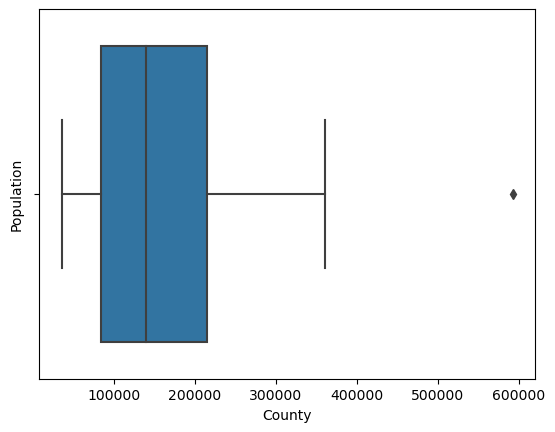

Calculating quartiles
Quartile 3 = 215181.0
Quartile 1 = 83782.0
IQR = 131399.0


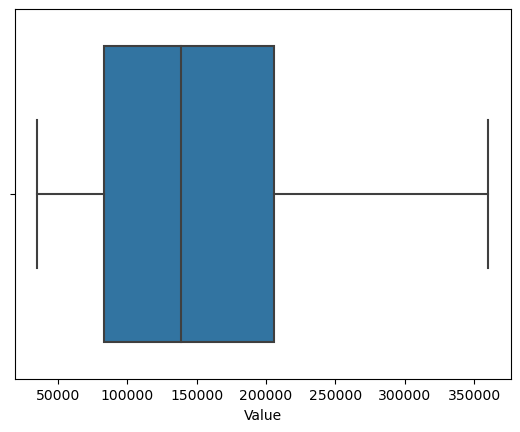

Outliers


,Value
County,
Dublin City,592713


In [73]:
# Get outliers byCountys with plotboxes
get_outliers_by_feature(df_population_2022, "County")

#### 1.8.2. Outliers by Age - 2022

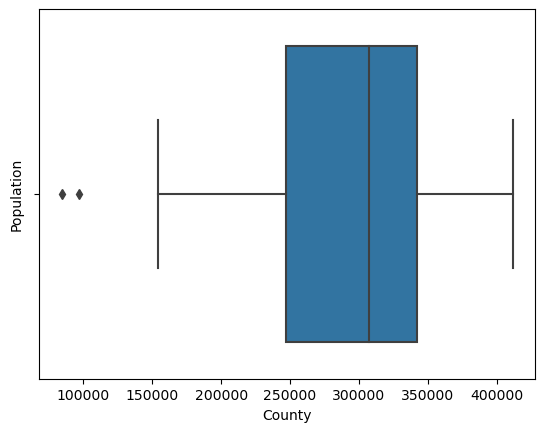

Calculating quartiles
Quartile 3 = 342003.25
Quartile 1 = 246775.5
IQR = 95227.75


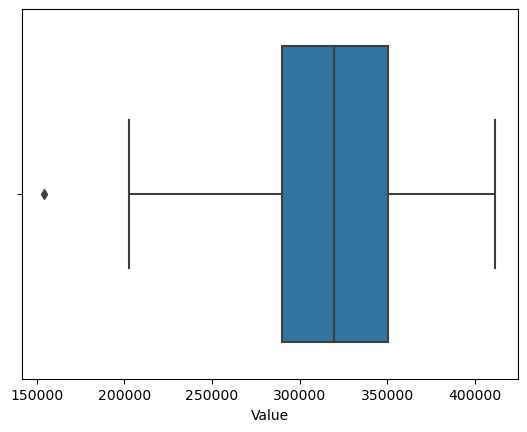

Outliers


,Value
Age,
Age 80-84,96586
Age 85 and over,84441


In [74]:
# Get outliers by Ages with plotboxes
get_outliers_by_feature(df_population_2022, "Age")

##### Data preparation and Visualization(dpv4)
4. All design and implementation of your visualizations must be justified and detailed in full., referring to Tufts Principles [0-20]

### 1.9. Plot different features against one another (scatter), against frequency (histogram)

##### Statistics for Data Analytics(sda1)
1. Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

#### 1.9.1 Population by County 2022

In [75]:
# Group by County
df_population_2022_by_county = df_population_2022[["County","Value"]].groupby('County').sum("Value").reset_index()

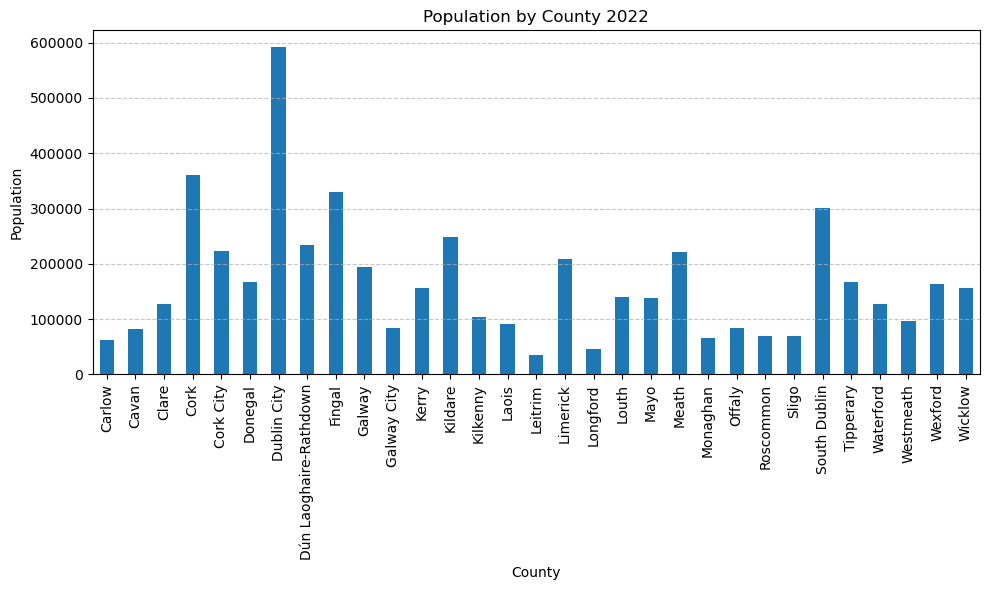

In [76]:
# Plotting the bar plot
df_population_2022_by_county.plot(kind='bar', figsize=(10, 6), legend = False, x="County" )
plt.title('Population by County 2022')
plt.xlabel('County')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
# Sort the dataframe by target
#target_0 = df_population[]
#target_1 = iris.loc[iris['target'] == 1]
#target_2 = iris.loc[iris['target'] == 2]

####sns.distplot(target_0[['sepal length (cm)']], hist=False, rug=True)
#sns.distplot(target_1[['sepal length (cm)']], hist=False, rug=True)
#sns.distplot(target_2[['sepal length (cm)']], hist=False, rug=True)

#plt.show()

#### 1.9.2 Sex of Population by County - 2022

In [78]:
df_coundy_sex = df_population_2022.groupby(["County","Sex"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


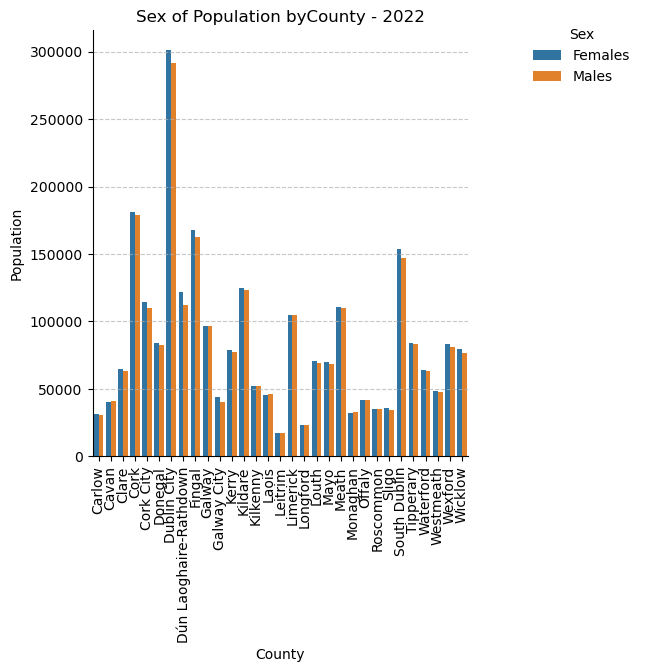

In [79]:
plotBarWithSeaborn(
    df_data = df_coundy_sex,
    x_name = "County",
    y_name = "Value",
    hue_ = "Sex",
    title = "Sex of Population byCounty - 2022",
    axis_x_name = "County",
    axis_y_name = "Population",
    rotation = True,
    legend_t = "Sex")

#### 1.9.3. Age of Population by Sex 2022

In [80]:
df_sex = df_population_2022.groupby(["Sex", "Age"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


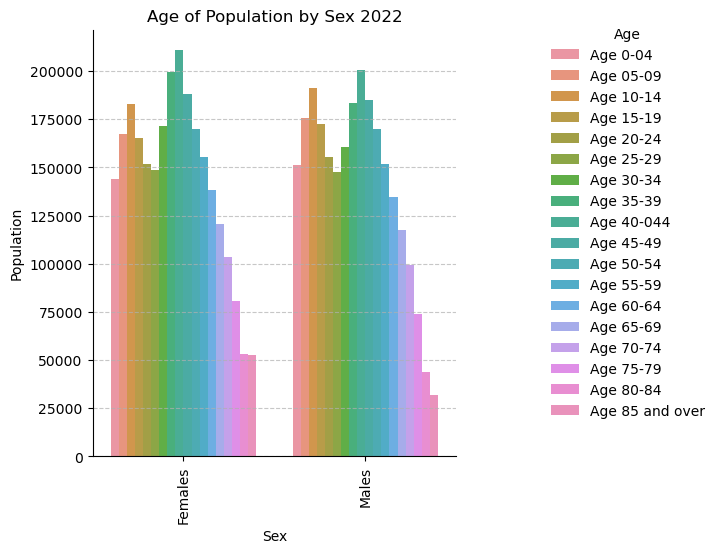

In [81]:
plotBarWithSeaborn(
    df_data = df_sex,    
    x_name = "Sex",
    y_name = "Value",
    title = "Age of Population by Sex 2022",
    axis_x_name = "Sex",
    axis_y_name = "Population",
    rotation = True,
    hue_= "Age",
    legend_t = "Age",
)

#### 1.9.4. Sex of Population by Ages 2022

In [82]:
df_age = df_population_2022[["Age", "Value"]].groupby(["Age"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


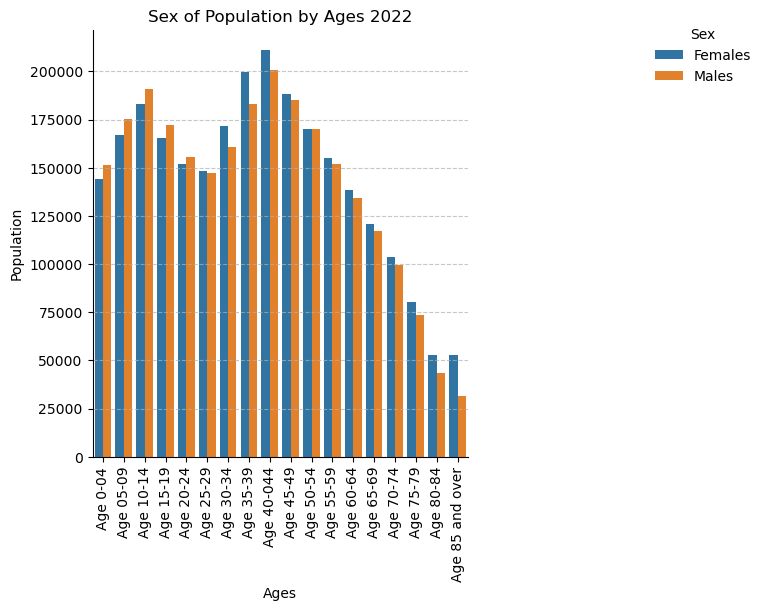

In [83]:
g = sns.catplot(
    x="Age",       # x variable name
    y="Value",       # y variable name
    hue="Sex",  # group variable name
    data=df_sex,     # dataframe to plot
    kind="bar",
)
plt.title('Sex of Population by Ages 2022')
plt.xlabel('Ages')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
sns.move_legend(g, "upper center", bbox_to_anchor=(1.2, 1), title='Sex')
plt.show()

#### 1.9.5. Scatterplot of Population

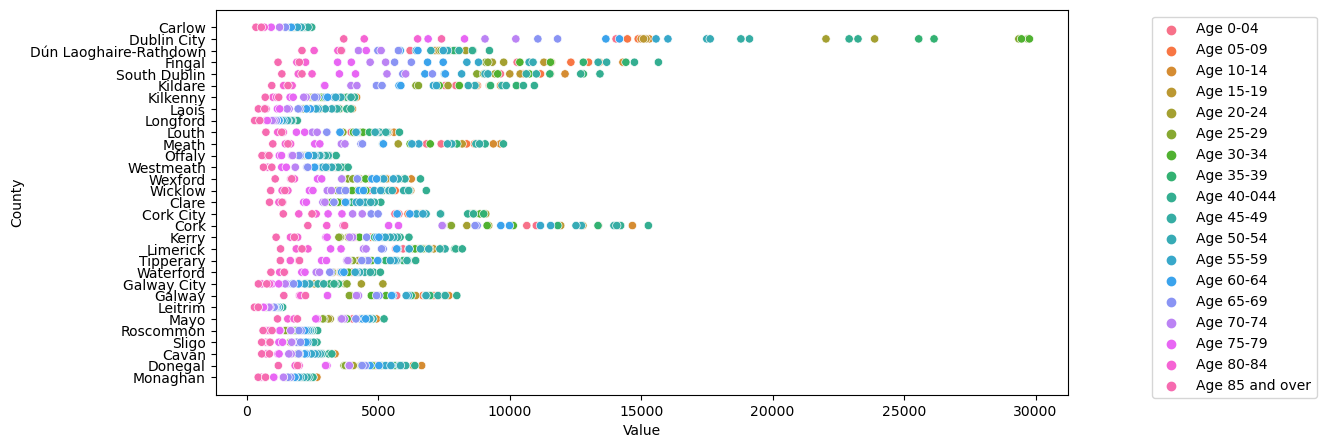

In [84]:
plt.figure(figsize=(11,5))
sns.scatterplot(data = df_population_2022, x= "Value", y ="County", hue="Age")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))

In [85]:
np.array(df_population["County"])

array(['Carlow', 'Carlow', 'Carlow', ..., 'Monaghan', 'Monaghan',
       'Monaghan'], dtype=object)

In [86]:
df_population.head()

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012
64,2011,Carlow,Age 25-29,Females,2087
66,2011,Carlow,Age 30-34,Males,2260


##### Statistic for Data Analytics(sda2)
2.- Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report.


## 2. Aplication of Statistic

### 2.1. Case study 1

What is the probability that if 3 people are chosen from the population, 2 of them will be girls?

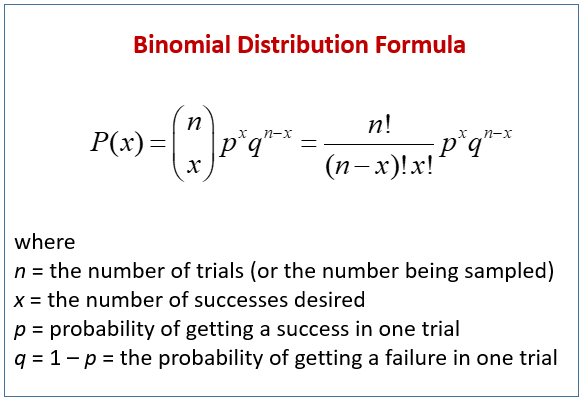

Solution:

- n = 3 people for choosing
- x = 2 girls
- We need to find  p = (total girls / total population)


In [87]:
total_population = df_age.Value.sum() 
print(f"We  have that the total  of the population is {total_population}")

We  have that the total  of the population is 5149139


We need to find total of girls

In [88]:
girl_ages = ["Age 0-04", "Age 05-09", "Age 10-14"]

In [89]:
total_girls = df_population_2022.loc[(df_population_2022["Sex"] == "Females") & (df_population_2022["Age"].isin(girl_ages))].Value.sum()
print(f"We  have that the total  of the girls is {total_girls}")

We  have that the total  of the girls is 494295


In [90]:
girl_probabilty = total_girls / total_population
print(f"Then p = {girl_probabilty}")

Then p = 0.09599566063374868


In [91]:
#probability of a specific number of successes (or failures) in a fixed number of independent trials, each with the same probability of success.
result = stats.binom.pmf(k = 2,        # Probability of k = 2 successes
                n = 3,                 # With 3 people
                p = girl_probabilty)   # And success probability

probability = round(result*100)
print(f"The probability to find 2 girls when we pick up 3 people is {probability}%")

The probability to find 2 girls when we pick up 3 people is 2%


col_0         0       1      2    3
row_0                              
counts  5561046  428019  10834  101


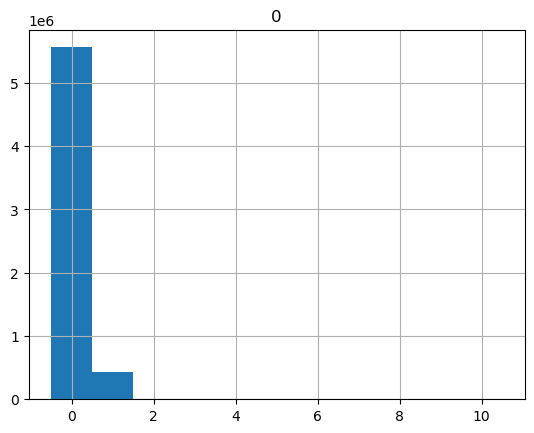

In [92]:
pick_up_2_girls = stats.binom.rvs(n = 3,               # Number of people choosen
                                  p = result,          # Success probability
                                  size = 6000000)      # Number of trials

print( pd.crosstab(index="counts", columns= pick_up_2_girls))

pd.DataFrame(pick_up_2_girls).hist(range=(-0.5,10.5), bins=11);

Now we can show the distribution with a sample bigger and we noticed the distribution is not symmetric:

### 2.2. Case Study 2

What is the probability that if 40 people are chosen from the population, 30 of them will be men?

Solution:

- n = 40 people for choosing
- x = 30 men
- We need to find  p = (total men / total population)


In [93]:
total_population = df_sex.Value.sum() 
print(f"We  have that the total  of the population is {total_population}")

We  have that the total  of the population is 5149139


We need to find total of men

In [94]:
total_men = df_population_2022.loc[(df_population_2022["Sex"] == "Males")].Value.sum()
print(f"We  have that the total  of the men is {total_men}")

We  have that the total  of the men is 2544549


In [95]:
men_probability = total_men / total_population 
print(f"Then p = {men_probability}")

Then p = 0.49416980198048643


In [96]:
#probability of a specific number of successes (or failures) in a fixed number of independent trials, each with the same probability of success.
result = stats.binom.pmf(k = 30,        # Probability of k = 30 successes
                n = 40,                 # With 40 people
                p = men_probability)   # And success probability

probability = round(result*100, 2)
print(f"The probability to find 2 girls when we pick up 3 people is {probability}%")

The probability to find 2 girls when we pick up 3 people is 0.06%


Now we can show the distribution with a sample bigger and we noticed the distribution is not symmetric

col_0         0       1     2   3
row_0                            
counts  9759088  238076  2826  10


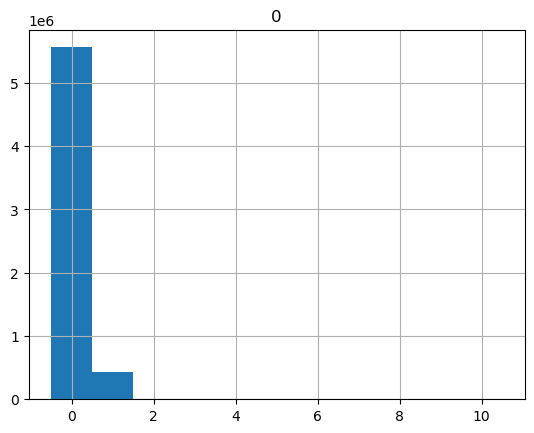

In [97]:
pick_up_30_men = stats.binom.rvs(n = 40,               # Number of people choosen
                                  p = result,          # Success probability
                                  size = 10000000)      # Number of trials

print( pd.crosstab(index="counts", columns= pick_up_30_men))

pd.DataFrame(pick_up_2_girls).hist(range=(-0.5,10.5), bins=11);

## 3. Analysis of the characteristics

In [98]:
df_population.head()

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012
64,2011,Carlow,Age 25-29,Females,2087
66,2011,Carlow,Age 30-34,Males,2260


In [99]:
df_population.describe()

,Year,Value
count,3348.000000,3348.000000
mean,2016.333333,4330.721625
std,4.497584,3756.319547
min,2011.000000,179.000000
25%,2011.000000,1927.750000
50%,2016.000000,3377.500000
75%,2022.000000,5506.250000
max,2022.000000,31838.000000


### 3.1. Correlations

##### Data preparation and Visualization(dpv3)
3. Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]

we are going to check if there is a correlation and we need to transform our categorical columns

In [100]:
df_population_encode = df_population.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_population_encode['Age'] = label_encoder.fit_transform(df_population_encode['Age'])
df_population_encode['Sex'] = label_encoder.fit_transform(df_population_encode['Sex'])
df_population_encode['County'] = label_encoder.fit_transform(df_population_encode['County'])


df_population_encode.corr()

,Year,County,Age,Sex,Value
Year,1.000000e+00,-1.657346e-15,2.664489e-15,1.116914e-15,0.055186
County,-1.657346e-15,1.000000e+00,-5.557723e-16,2.360929e-16,-0.206057
Age,2.664489e-15,-5.557723e-16,1.000000e+00,9.613067e-18,-0.333244
Sex,1.116914e-15,2.360929e-16,9.613067e-18,1.000000e+00,-0.012399
Value,5.518551e-02,-2.060573e-01,-3.332442e-01,-1.239864e-02,1.000000


In [101]:
correlation = df_population_encode.corr()

#### 3.1.1. Visualization of Correlation

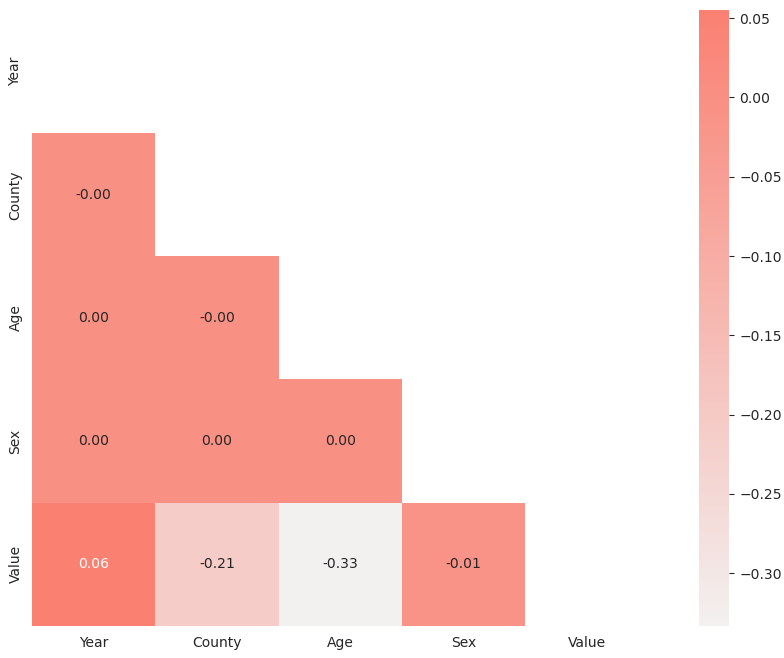

In [102]:
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlation, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Now we can see there is a slight negative correlation between Population - County and Population - Age

#### 3.1.2. Distribution Analysis

##### Statistics for Data Analytics(sda3)
3. Use Normal distribution to explain or identify some information about your dataset. [0-20]

Text(0.5, 0, 'Population')

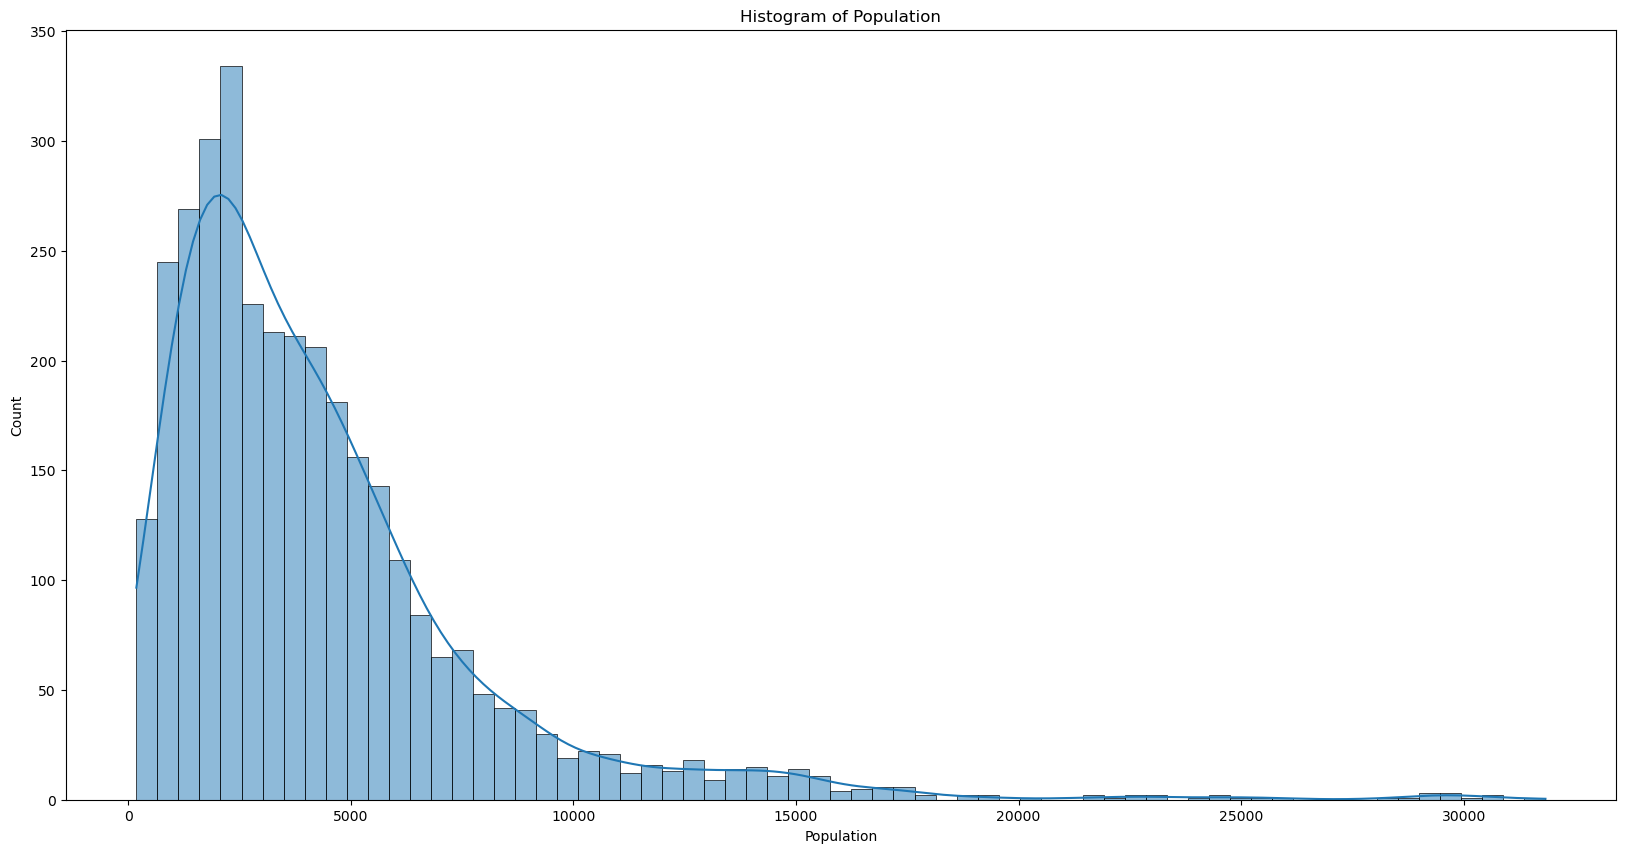

In [103]:
ax = sns.histplot(data=df_population, x = 'Value', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title("Histogram of Population")
ax.set_xlabel("Population")

#### 3.1.3. Distribution transformation
We are obtaining a logarithmic transformation to obtain a symmetric distribution and thus be able to work with the linear regression model.

    Log 1 p = log(1 + x)

We must take into account performing the inverse transformation to obtain the original value.

    expm 1 = exp(x) - 1

In [104]:
df_population.head()

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012
64,2011,Carlow,Age 25-29,Females,2087
66,2011,Carlow,Age 30-34,Males,2260


In [105]:
from sklearn.preprocessing import FunctionTransformer

transformer =  FunctionTransformer(np.log1p, validate= True)
data_transformed = transformer.transform(df_population.select_dtypes(exclude=['object']))
data_transformed

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


array([[7.60688453, 7.53796266],
       [7.60688453, 7.46164039],
       [7.60688453, 7.60738143],
       ...,
       [7.61233684, 6.52502966],
       [7.61233684, 6.0591232 ],
       [7.61233684, 6.56103067]])

In [106]:
data_columns_transformed = df_population.select_dtypes(exclude=['object']).columns
df_transformed = pd.concat([df_population.select_dtypes(include=['object']).reset_index(drop=True), pd.DataFrame(data_transformed, columns=data_columns_transformed)], axis=1)
df_transformed.head()

,County,Age,Sex,Year,Value
0,Carlow,Age 20-24,Males,7.606885,7.537963
1,Carlow,Age 20-24,Females,7.606885,7.461640
2,Carlow,Age 25-29,Males,7.606885,7.607381
3,Carlow,Age 25-29,Females,7.606885,7.643962
4,Carlow,Age 30-34,Males,7.606885,7.723562


#### 3.1.3. Visualization of Correlation after

In [107]:
df_population_encode = df_transformed.copy()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_population_encode['Age'] = label_encoder.fit_transform(df_population_encode['Age'])
df_population_encode['Sex'] = label_encoder.fit_transform(df_population_encode['Sex'])
df_population_encode['County'] = label_encoder.fit_transform(df_population_encode['County'])


df_population_encode.corr()

,County,Age,Sex,Year,Value
County,1.000000e+00,-5.557723e-16,2.360929e-16,-3.262428e-13,-0.133403
Age,-5.557723e-16,1.000000e+00,9.613067e-18,1.463500e-15,-0.480062
Sex,2.360929e-16,9.613067e-18,1.000000e+00,1.635460e-15,-0.033081
Year,-3.262428e-13,1.463500e-15,1.635460e-15,1.000000e+00,0.084476
Value,-1.334029e-01,-4.800617e-01,-3.308149e-02,8.447573e-02,1.000000


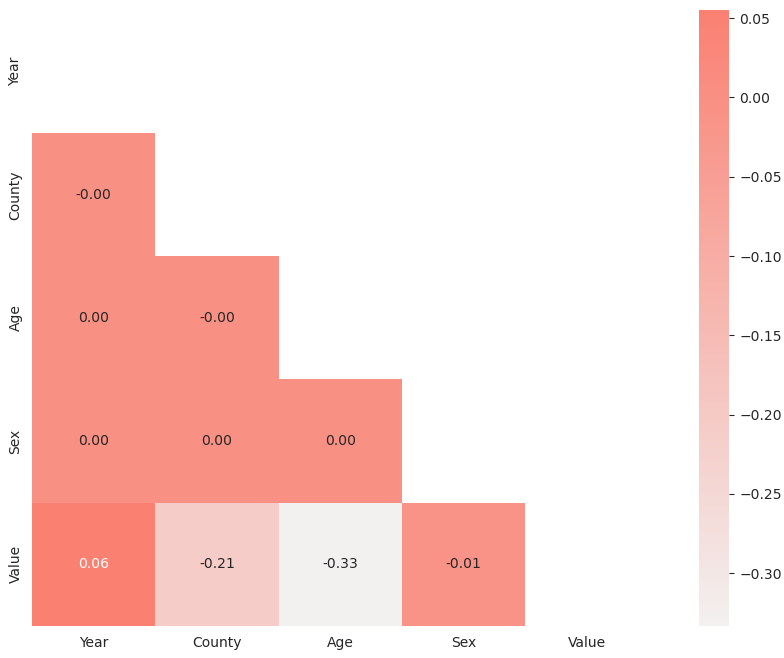

In [108]:
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlation, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

We can see that there is no any value close to 1 or -1, then our transformation does not affect the correlation

#### 3.2. Simetric Distribution

Text(0.5, 0, 'Population')

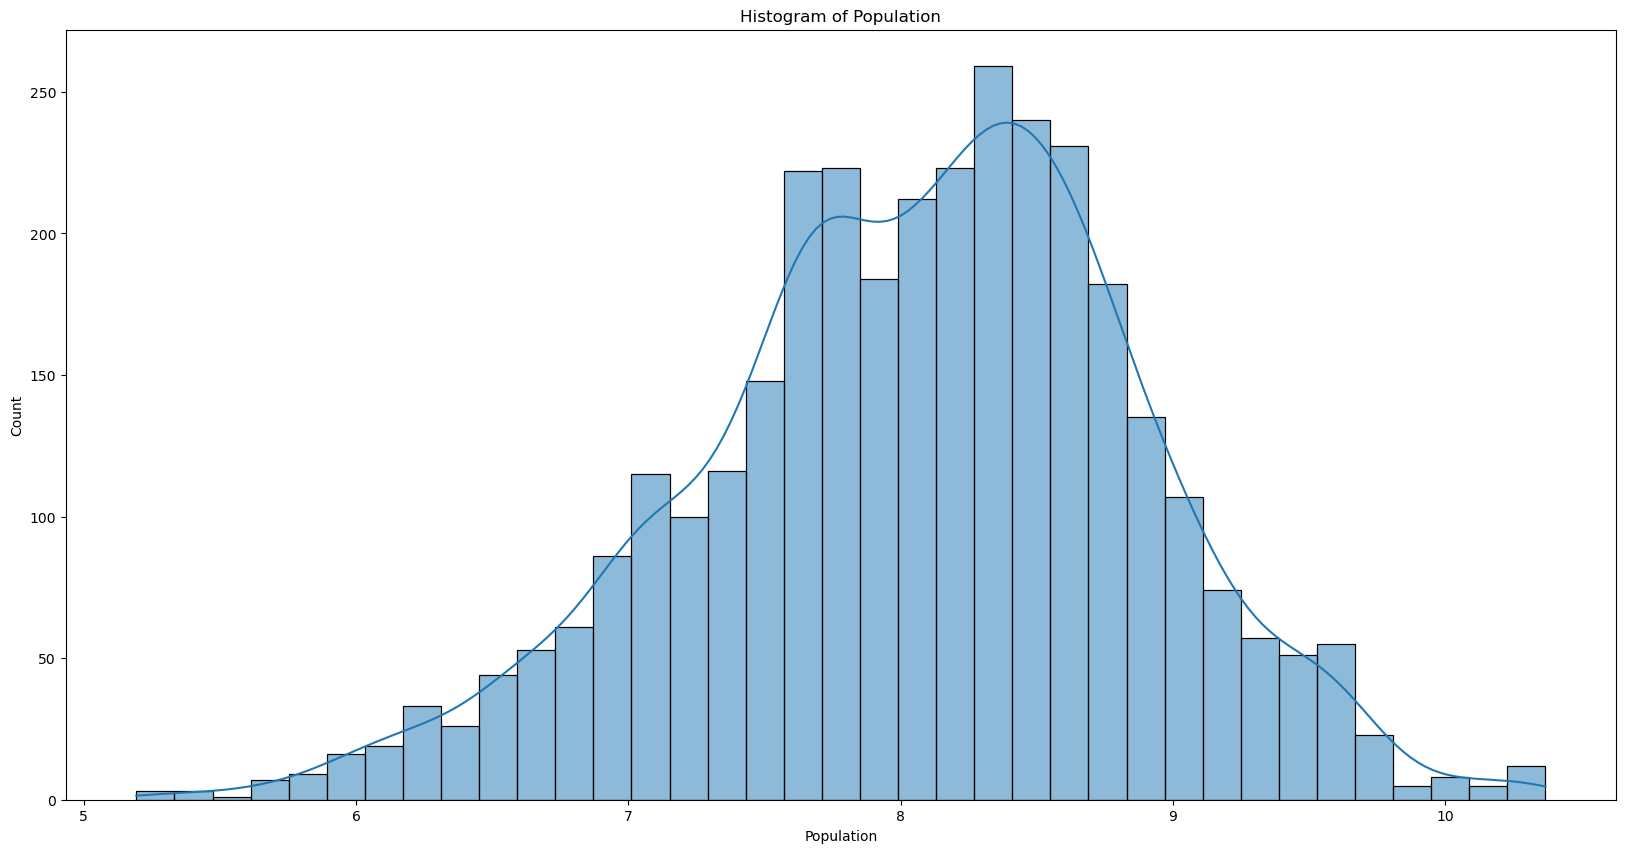

In [109]:
ax = sns.histplot(data=df_transformed, x = 'Value', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title("Histogram of Population")
ax.set_xlabel("Population")

Conclusion: The population does not follow a normal distribution over the last 13 years. Which tells us that there was a time in the history of society where an important event occurred that affected said distribution. Since it is assumed that a general population should have a normal distribution with respect to the ages of the population.

##### Statistics for Data Analytics(sda4)
4. Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]

<b>The importance of distributions</b> in data analysis influences the choice of types of machine learning algorithms. Because certain models work best on data with normalised or standardised distributions and some models do not even have a condition for applying the algorithm to perform the learning, but when tested they influence the time and resources of data processing. 

## 4. Machine Learning

##### Data preparation and Visualization(mda2)
2. You must also rationalise, justify, and detail all the methods used to prepare the data for ML (Scaling, Encoding, imputation etc…). [0-40]

The methods used for data preparation were as follows:
- EDA : In summary it includes data analysis and cleaning, identification of outliers, replacement of values, analysis of null and repeated values.
- Normalisation of the distribution: This is a very important aspect for the choice of learning models. In this project the normalisation by Logarithm was applied.
- Dummies: This technique was used to convert the categorical values into numerical data, transposing the rows referring to the categories into columns in our data. 

Translated with DeepL.com (free version)

### 4.1. Data Preparation

#### 4.1.1 Dummies 

In [110]:
categorical_columns = df_population.select_dtypes(include=['object']).columns
categorical_columns

Index(['County', 'Age', 'Sex'], dtype='object')

In [111]:
df_dummies = pd.get_dummies(df_transformed[categorical_columns])
df_dummies.head()

,County_Carlow,County_Cavan,County_Clare,County_Cork,County_Cork City,County_Donegal,County_Dublin City,County_Dún Laoghaire-Rathdown,County_Fingal,County_Galway,...,Age_Age 50-54,Age_Age 55-59,Age_Age 60-64,Age_Age 65-69,Age_Age 70-74,Age_Age 75-79,Age_Age 80-84,Age_Age 85 and over,Sex_Females,Sex_Males
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [112]:
df_transformed_dummies = pd.concat([df_transformed.drop(categorical_columns, axis=1), df_dummies], axis=1)
df_transformed_dummies.head()

,Year,Value,County_Carlow,County_Cavan,County_Clare,County_Cork,County_Cork City,County_Donegal,County_Dublin City,County_Dún Laoghaire-Rathdown,...,Age_Age 50-54,Age_Age 55-59,Age_Age 60-64,Age_Age 65-69,Age_Age 70-74,Age_Age 75-79,Age_Age 80-84,Age_Age 85 and over,Sex_Females,Sex_Males
0,7.606885,7.537963,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,7.606885,7.461640,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,7.606885,7.607381,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,7.606885,7.643962,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,7.606885,7.723562,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


##### Machine learning for Data Analytics(mda1)
1. Explain which project management framework  (CRISP-DM, KDD or SEMMA) is required for a data science project. Discuss and justify with real-life scenarios. Provide an explanation of why you chose a supervised, unsupervised, or semi-supervised machine learning technique for the dataset you used for ML modeling. [0 - 20]

### 4.2 Models 

##### Machine learning for Data Analytics(mda3)
3. Show the results of two or more ML modeling comparisons in a table or graph format. Review and critically examine the machine learning models' performance based on the selected metric for supervised, unsupervised, and semi-supervised approaches. [0 - 30]

#### 4.2.1. Lineal Regression

- Linear regression analysis comprises the study of the dependence of a variable (dependent variable) with respect to one or more explanatory variables. For the purpose of estimating or predicting a value through the study of the known values of the population.

In [113]:
df_popaulation_prep = df_population

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Suppose df is your DataFrame containing the data
# Data preparation

# Split the data into features (X) and target variable (y)
X = df_transformed_dummies.drop("Value", axis=1)  # Now, X contains all our independent numeric values 
y = df_transformed_dummies['Value']  # 'cantidad' column is your target variable you're trying to predict

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions on the test set
prediction_r = model.predict(X_test)

array([6.53515625, 8.21099854, 8.06121826, ..., 7.71759033, 8.12445068,
       8.86254883])

In [115]:
# Inverse transformation for getting the first prediction
np.expm1(6.54318237)

693.4931993542871

#### Performance metrics

#### Determination coefficient
    - It helps us see that the sample regression line also fits the data
    - r2 has values between 0 and 1
    - r2 measures the proportion or percentage of the total variation of y with respect to the regression model

In [116]:
r2_lr = r2_score(y_test, prediction_r)
r2_lr

0.9471963760585413

#### 4.2.1.1 Prediction error graph

A Prediction Error Chart shows actual targets versus predicted values

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


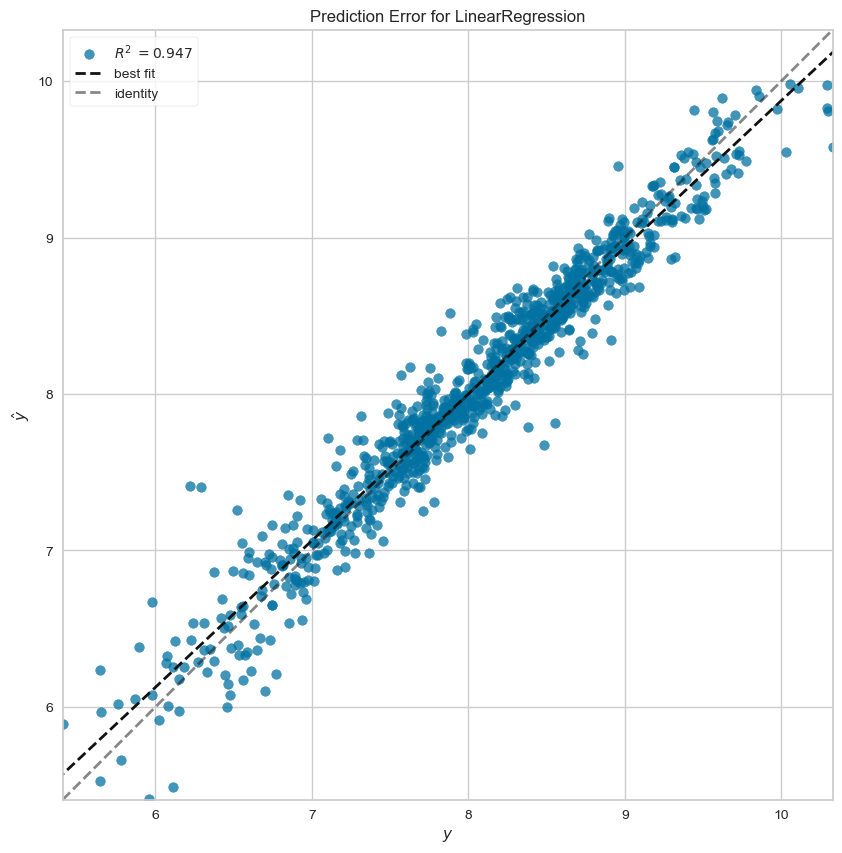

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [117]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pred_error_values = PredictionError(model)

pred_error_values.fit(X_train, y_train)
pred_error_values.score(X_test, y_test)

pred_error_values.poof()

#### 4.2.2 Decision Tree Regression

Implementation

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
#creatin model
model_tr = DecisionTreeRegressor(random_state=22, max_depth=5)

#training

model_tr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=22)

We can plot the tree

[Text(0.5613207547169812, 0.9166666666666666, 'x[49] <= 0.5\nsquared_error = 0.66\nsamples = 2343\nvalue = 8.056'),
 Text(0.3018867924528302, 0.75, 'x[48] <= 0.5\nsquared_error = 0.576\nsamples = 2214\nvalue = 8.128'),
 Text(0.1509433962264151, 0.5833333333333334, 'x[7] <= 0.5\nsquared_error = 0.492\nsamples = 2079\nvalue = 8.204'),
 Text(0.07547169811320754, 0.4166666666666667, 'x[16] <= 0.5\nsquared_error = 0.432\nsamples = 2012\nvalue = 8.156'),
 Text(0.03773584905660377, 0.25, 'x[4] <= 0.5\nsquared_error = 0.388\nsamples = 1948\nvalue = 8.198'),
 Text(0.018867924528301886, 0.08333333333333333, 'squared_error = 0.352\nsamples = 1882\nvalue = 8.159'),
 Text(0.05660377358490566, 0.08333333333333333, 'squared_error = 0.119\nsamples = 66\nvalue = 9.318'),
 Text(0.11320754716981132, 0.25, 'x[47] <= 0.5\nsquared_error = 0.062\nsamples = 64\nvalue = 6.873'),
 Text(0.09433962264150944, 0.08333333333333333, 'squared_error = 0.039\nsamples = 61\nvalue = 6.908'),
 Text(0.1320754716981132, 0.08

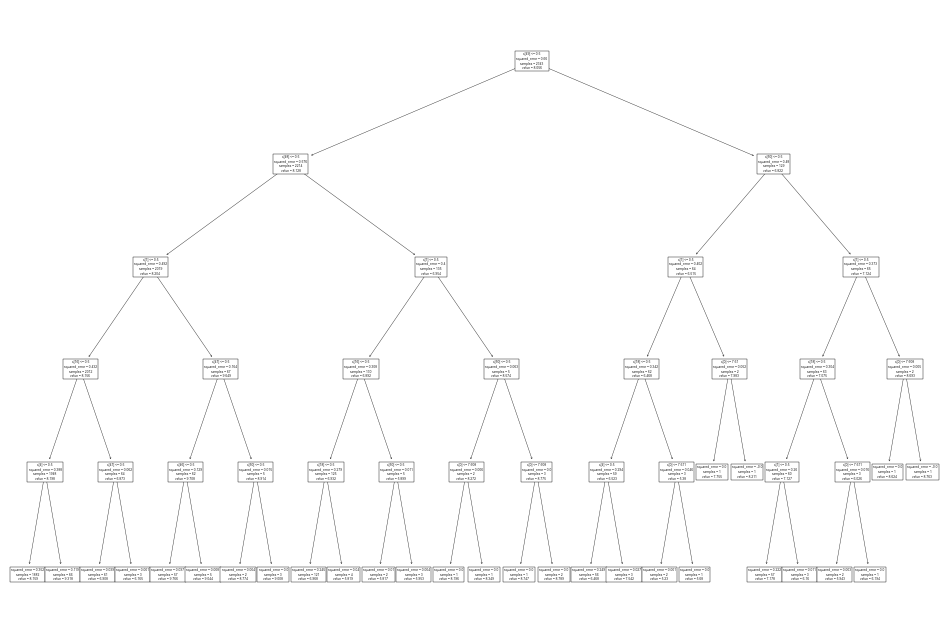

In [120]:
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(model_tr.fit(X_train, y_train)) 

In [121]:
#test
prediction_tr = model_tr.predict(X_test)

#results
prediction_tr

array([6.96846379, 8.15918521, 8.15918521, ..., 8.15918521, 8.15918521,
       8.15918521])

In [122]:
print("The ccuracy is "+str(model_tr.score(X_test, y_test)))

The ccuracy is 0.51176904602056


#### 4.2.2.1. Prediction error graph

A Prediction Error Chart shows actual targets versus predicted values

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


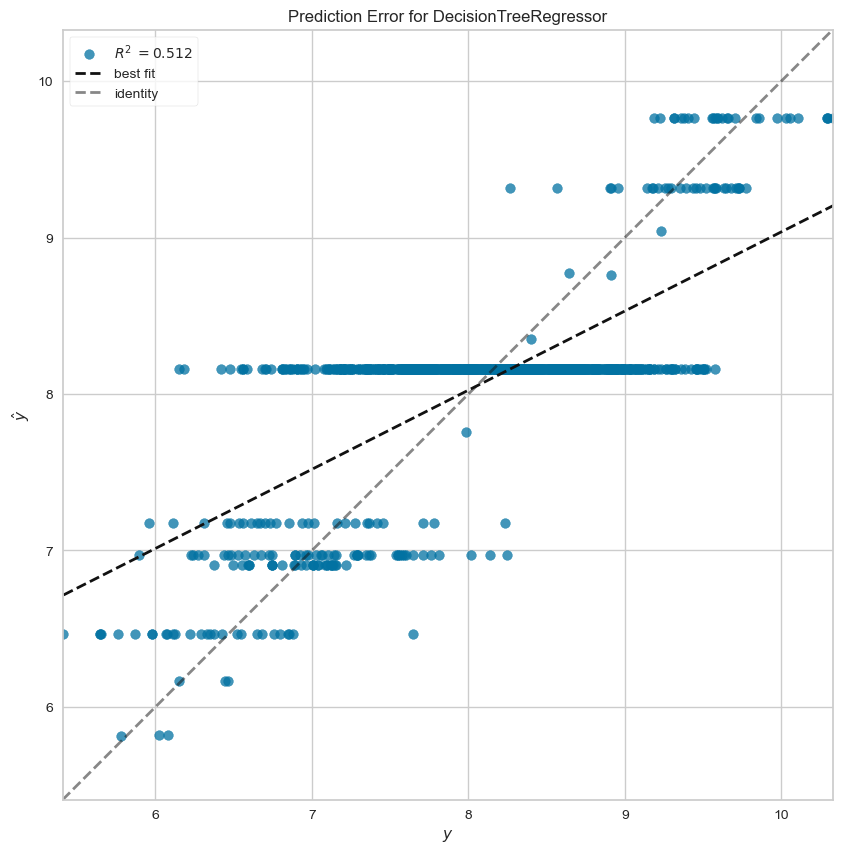

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [123]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pred_error_values = PredictionError(estimator= model_tr)

pred_error_values.fit(X_train, y_train)
pred_error_values.score(X_test, y_test)

pred_error_values.poof()

#### 4.2.2.2. Metric

In [124]:
#determination coefficient
r2_lr = r2_score(y_test, prediction_tr)
r2_lr

0.51176904602056

#### 4.2.3. Random Forest Model

<b>Observation: </b>  The parameters between DecisionTreeRegressor y RandomForestRegressor are the same

    - n_estimators: number of trees 
    - bootstrap: define if we use bootstrap statistic sample
    - oob_score: define if we use out-of-bag for meassure the predicted errors
    - n_jobs: number of job that are executed
    - warm_start: adaptation of a new forest or use of an ex
    - max_samples: In case bootstrap is True we neew to define the sample 

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the Random Forest model
model_rfr = RandomForestRegressor(n_estimators=10, random_state=22, max_depth= 5)
model_rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=10, random_state=22)

In [126]:
prediction_rfr = model_rfr.predict(X_test)

#### 4.2.3.1. Prediction error graph

A Prediction Error Chart shows actual targets versus predicted values

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


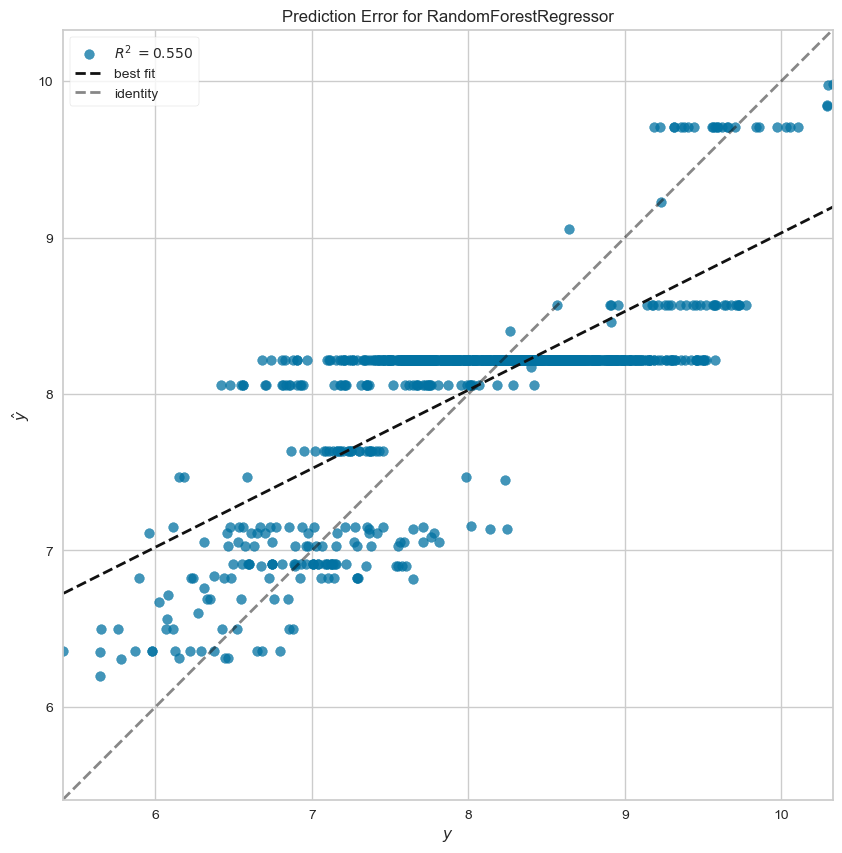

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [127]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pred_error_values = PredictionError(model_rfr)

pred_error_values.fit(X_train, y_train)
pred_error_values.score(X_test, y_test)

pred_error_values.poof()

#### 4.2.3.2 Metric

In [128]:
#determination coefficient
r2_lr = r2_score(y_test, prediction_rfr)
r2_lr

0.549856999105105

In [129]:
# Model evaluation
train_score = model_rfr.score(X_train, y_train)
test_score = model_rfr.score(X_test, y_test)

print("R^2 score in training set:", train_score)
print("R^2 score in test set:", test_score)


R^2 score in training set: 0.5625217708634408
R^2 score in test set: 0.549856999105105


## 5. Model Opimization 

In [130]:
#spliting dataset
from sklearn.model_selection import KFold

#defining the K numbers of sets
cv = KFold(n_splits= 3, shuffle= True)

### 5.1. Linear Regression

#### 5.1.1. Cross validation Regression


In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
accuracy_cross_val_r2_r = cross_val_score(estimator= model,
                                       X = X_train,
                                       y = y_train,
                                       scoring= 'r2',
                                       cv=cv)

print("Mean accuracy from r2: {}".format(round(accuracy_cross_val_r2_r.mean(), 3)))

Mean accuracy from r2: 0.942


### 5.2. Tree Regression

##### Machine learning for Data Analytics(mda2)
2. Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. [0 - 30]

#### 5.2.1. Cross validation Tree Regression


In [133]:
accuracy_cross_val_r2_tr = cross_val_score(estimator= model_tr,
                                       X = X_train,
                                       y = y_train,
                                       scoring= 'r2',
                                       cv=cv)

print("Mean accuracy from r2: {}".format(round(accuracy_cross_val_r2_tr.mean(), 3)))

Mean accuracy from r2: 0.496


#### 5.2.2. Random Search Validation

In [134]:
#selection of hyperparameters
param_random_model = {
    'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : [6, 8, 10, 12, 14, 16,20],
    'min_samples_leaf' : [6, 8, 10, 16],
    'min_samples_split' : [8, 10, 12, 14, 16,20],
    'max_features' : ['sqrt', 'log2', 'auto'] 
}

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
random_cv_model_dt = RandomizedSearchCV(
    model_tr, 
    param_random_model, 
    n_iter= 21, 
    cv=cv, 
    scoring='r2', 
    n_jobs=-1
)

In [137]:
randomcv_model_tr = random_cv_model_dt.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 63.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sk

In [138]:
pd.DataFrame(randomcv_model_tr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.088999,0.002828,0.004667,4.713705e-04,8,8,log2,12,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.454258,0.472723,0.491978,0.472987,0.015400,11
1,0.002334,0.000471,0.000000,0.000000e+00,16,10,auto,14,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,19
2,0.002667,0.000472,0.000000,0.000000e+00,8,16,auto,8,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",NaN,NaN,NaN,NaN,NaN,19
3,0.008666,0.000943,0.004334,4.708086e-04,12,6,log2,20,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.561289,0.566995,0.600879,0.576388,0.017474,2
4,0.007333,0.000472,0.004001,2.247832e-07,10,10,log2,6,squared_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.232426,0.216709,0.247714,0.232283,0.012658,18
5,0.007668,0.000471,0.003999,1.236308e-06,20,10,sqrt,20,squared_error,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.664021,0.667353,0.630078,0.653817,0.016841,1
6,0.116332,0.001249,0.004001,1.408263e-06,12,16,log2,16,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.533189,0.573566,0.596060,0.567605,0.026011,3
7,0.006333,0.000471,0.003667,4.728316e-04,10,16,log2,12,squared_error,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.464400,0.367579,0.386764,0.406248,0.041859,12
8,0.007334,0.000943,0.003999,0.000000e+00,8,6,sqrt,14,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.579338,0.578438,0.536507,0.564761,0.019982,5
9,0.069665,0.005907,0.003667,4.713147e-04,20,10,log2,6,absolute_error,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.221493,0.216663,0.266970,0.235042,0.022662,15


The best  paramenter

In [139]:
randomcv_model_tr.best_params_

{'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20,
 'criterion': 'squared_error'}

The best score

In [140]:
randomcv_model_tr.best_score_

0.6538170745030742

#### 5.2.3. RandomizedSearch Test

In [141]:
#creating model
model_tr_optimized = DecisionTreeRegressor(
    min_samples_split=16,
    min_samples_leaf= 6,
    max_features="sqrt",
    max_depth=20,
    random_state=22
)

#training
model_tr_optimized.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=16, random_state=22)

In [142]:
prediction_tr_optimized = model_tr_optimized.predict(X_test)

In [143]:
r2_score(y_test, prediction_tr_optimized)

0.6898138364399738

### 5.3. Random Forest

#### 5.3.1. Cross validation


In [144]:
accuracy_cross_val_r2_rf = cross_val_score(estimator= model_rfr,
                                       X = X_train,
                                       y = y_train,
                                       scoring= 'r2',
                                       cv=cv)

print("Mean accuracy from r2: {}".format(round(accuracy_cross_val_r2_rf.mean(), 3)))

Mean accuracy from r2: 0.55


#### 5.3.2. Random Search Validation

In [145]:
#selection of hyoerparameters
param_random_modelRF = {
    "n_estimators" : [150, 200],
    "max_depth" : [20, 30],
    "min_samples_split" : [8, 10],
    "min_samples_leaf" : [3]
}

In [146]:
random_cv_model_rf = RandomizedSearchCV(
    model_rfr, 
    param_random_modelRF, 
    n_iter= 5, 
    cv=cv, 
    scoring='r2', 
    n_jobs=-1,
    random_state= 32
)

In [147]:
randomcv_model_rf = random_cv_model_rf.fit(X_train, y_train)

In [148]:
pd.DataFrame(randomcv_model_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.808332,0.015691,0.038334,0.003771,150,10,3,30,"{'n_estimators': 150, 'min_samples_split': 10,...",0.831611,0.882437,0.873498,0.862515,0.022155,1
1,2.006547,0.005883,0.039330,0.000467,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.804853,0.857724,0.847796,0.836791,0.022944,5
2,1.589666,0.014522,0.047334,0.002624,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.804198,0.857974,0.848276,0.836816,0.023402,4
3,1.541999,0.005098,0.045667,0.000471,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.805268,0.858453,0.849093,0.837605,0.023183,3
4,1.150914,0.011891,0.029044,0.000814,150,8,3,30,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.830317,0.881870,0.872396,0.861528,0.022405,2


In [149]:
randomcv_model_rf.best_params_

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [150]:
randomcv_model_rf.best_score_

0.8625154868521147

#### 5.3.3. Random Search Test

In [151]:
model_rfr_optimized = RandomForestRegressor(
    n_estimators=150,
    min_samples_split=10,
    min_samples_leaf=3,
    max_depth=30,
    random_state=32
)

In [152]:
model_rfr_optimized.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=150, random_state=32)

In [153]:
prediction_rfr_optimized = model_rfr_optimized.predict(X_test)

In [154]:
r2_score(y_test, prediction_rfr_optimized)

0.8962308074775355

### 5.4. Choosing a better Model

##### Machine learning for Data Analytics(mda4)
4. Demonstrate the similarities and differences between your Machine Learning modelling results using the tables or visualizations. Provide a report along with an explanation and interpretation of the relevance and effectiveness of your findings. [0 - 20]

# Comparison of Machine Learning Models

In [155]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# getting data
X = df_transformed_dummies.drop("Value", axis=1)  # Now, X contains all our independent numeric values 
y = df_transformed_dummies['Value']  # 'cantidad' column is your target variable you're trying to predict


# split values
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir modelos with Hiperparameters choosen in Optimization
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(
                                    min_samples_split=16,
                                    min_samples_leaf= 6,
                                    max_features="sqrt",
                                    max_depth=20,
                                    random_state=22
                                ),
    "Random Forest Regression": RandomForestRegressor(
                                    n_estimators=150,
                                    min_samples_split=10,
                                    min_samples_leaf=3,
                                    max_depth=30,
                                    random_state=32
                                )
}



Linear Regression: 0.9406109817256426
Decision Tree Regression: 0.6806357835097043
Random Forest Regression: 0.8896791850489074


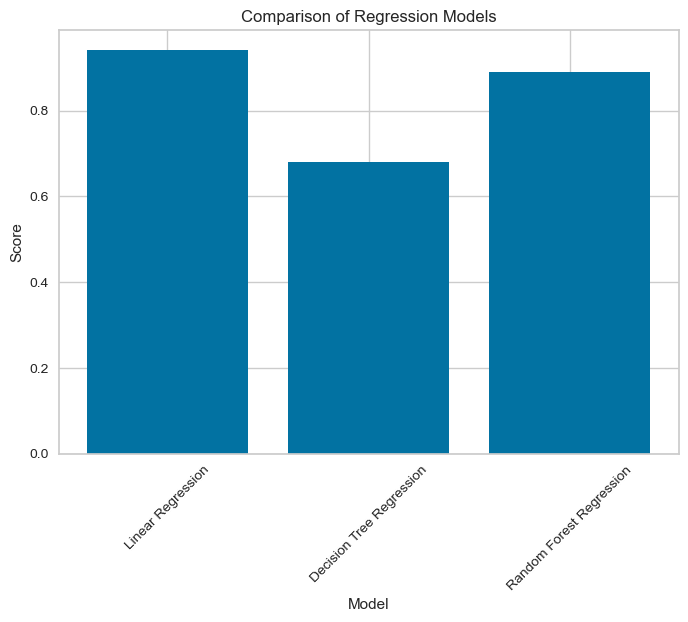

In [156]:
# Entrenar y evaluar modelos
results = {}
for name, model_c in models.items():
    model_c.fit(X_train_c, y_train_c)
    y_pred = model_c.predict(X_test_c)    
    # mse = mean_squared_error(y_test, y_pred)
    mse = r2_score(y_test_c, y_pred)
    results[name] = mse
    
# Mostrar resultados
for name, mse in results.items():
    print(f"{name}: {mse}")
    
# Graficar resultados
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=45)
plt.show()

# 6. Conclusion

We can now predict the population in Ireland with respect to Sex, Age Group and any County.

All this using linear regression, which is a supervised learning algorithm and for data has an accuracy of 94%.

In [236]:
# Table of results
print("Random Search")
print("="*35)
print("Linear Regression: %f" % r2_score(y_test, prediction_r))
print("Desicion Tree: %f" % r2_score(y_test, prediction_tr_optimized))
print("Random Forest: %f" % r2_score(y_test, prediction_rfr_optimized))
print("="*35)

print("Cross Validation")
print("="*35)
print("Linear Regression: %f" % round(accuracy_cross_val_r2_r.mean(), 3))
print("Desicion Tree: %f" % round(accuracy_cross_val_r2_tr.mean(), 3))
print("Random Forest: %f" % round(accuracy_cross_val_r2_rf.mean(), 3))
      


Random Search
Linear Regression: 0.947196
Desicion Tree: 0.689814
Random Forest: 0.896231
Cross Validation
Linear Regression: 0.942000
Desicion Tree: 0.496000
Random Forest: 0.550000


In [237]:
df_population.head()

,Year,County,Age,Sex,Value
60,2011,Carlow,Age 20-24,Males,1877
61,2011,Carlow,Age 20-24,Females,1739
63,2011,Carlow,Age 25-29,Males,2012
64,2011,Carlow,Age 25-29,Females,2087
66,2011,Carlow,Age 30-34,Males,2260


In [247]:
# Data prediciton from customer
#Year 2026
#County Dublin
#Age 65-69
#Sex Female

year = 2024
transformed_year = np.log1p(year) # We need to transform the data
year_test = np.expm1(transformed_year)
print("Year: "+str(year))
print("transformed year: "+str(transformed_year))
print("year : "+str(round(year_test)))

Year: 2024
transformed year: 7.613324979540639
year : 2024


In [248]:
client = {
    'Year': [transformed_year],
    'County_Carlow': [1],
    'County_Cavan': [0],
    'County_Clare': [0],
    'County_Cork': [0],
    'County_Cork City': [0],
    'County_Donegal': [0],
    'County_Dublin City': [0],
    'County_Dún Laoghaire-Rathdown': [0],
    'County_Fingal': [0],
    'County_Galway': [0],
    'County_Galway City':[0],
    'County_Kerry':[0],
    'County_Kildare': [0],
    'County_Kilkenny': [0],
    'County_Laois': [0],
    'County_Leitrim': [0],
    'County_Limerick': [0],
    'County_Longford': [0],
    'County_Louth': [0],
    'County_Mayo': [0],
    'County_Meath': [0],
    'County_Monaghan': [0],
    'County_Offaly': [0],
    'County_Roscommon': [0],
    'County_Sligo': [0],
    'County_South Dublin': [0],
    'County_Tipperary': [0],
    'County_Waterford': [0],
    'County_Westmeath': [0],
    'County_Wexford': [0],
    'County_Wicklow': [0],
    'Age_Age 0-04': [0],
    'Age_Age 05-09': [0],
    'Age_Age 10-14': [1],
    'Age_Age 15-19': [0],
    'Age_Age 20-24': [0],
    'Age_Age 25-29': [0],
    'Age_Age 30-34': [0],
    'Age_Age 35-39': [0],
    'Age_Age 40-044': [0],
    'Age_Age 45-49': [0],
    'Age_Age 50-54': [0],
    'Age_Age 55-59': [0],
    'Age_Age 60-64': [0],
    'Age_Age 65-69': [0],
    'Age_Age 70-74': [0],
    'Age_Age 75-79': [0],
    'Age_Age 80-84': [0],
    'Age_Age 85 and over': [0],
    'Sex_Females': [0],
    'Sex_Males': [1]
}

df_client = pd.DataFrame(client)

In [251]:
df_client[["Year", "County_Carlow", "Sex_Males","Age_Age 10-14"]]

,Year,County_Carlow,Sex_Males,Age_Age 10-14
0,7.613325,1,1,1


In [252]:
# Check the result
prediction_client = model.predict(df_client)
prediction_population = int(np.expm1(prediction_client))
print(prediction_population)

2249


In [253]:
#It shoud be more than pople from 2022
population_2022_test = df_population.loc[(df_population["Year"] == 2022) 
                                         & (df_population["County"] == "Carlow") 
                                         & (df_population["Age"] == "Age 25-29")
                                        & (df_population["Sex"] == "Females")]
print(population_2022_test.iloc[:,-1:])
population_2022_test

    Value
16   1626


,Year,County,Age,Sex,Value
16,2022,Carlow,Age 25-29,Females,1626


### References to question for CA:
- Statistics for Data Analytics = <b>sda</b>
- Data preparation and Visualization = <b>dpv</b>
- Machine learning for Data Analytics = <b>mda</b>
- Programming  for Data Analytics = <b>pda</b>